In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from tqdm.notebook import tqdm_notebook
from sklearn import preprocessing 
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
import pickle
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kagglesdsdata/competitions/6392/44054/train.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1600942634&Signature=ane%2FOTpPKw96nk3pWq7pKfqGihj0gWbzklN6ZGfsBS%2BCTM7FIxZfdO29gsbjA8i8EkyoMeFpdiyBuG5xPyMqimiMyOUhZm0cujJwTPVwOpGE9drDZJH%2B5PhxktBDU%2BIlCdIOZ7MwO8WjwLM%2FXVAdoMpZSQ7swprHNh%2BVdD049jwGhxE9ElIGyGZf%2BaFa2MEtXAethTgo1jP%2BmnYDKOi05WqzyehyOB2ig5vWYN7H4o%2FL2%2Bj5gccWfgTNUsIfJQeBN2slF%2Fp4sRjYt6ILbGXuZNwDcilI%2Fsboj%2FYhn2MHQr2NpYNCWjeEfp7D5sXp5BVkd5Xbxb4KWzohmFQIju1kyQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.csv.zip" -c -O 'train.csv.zip'

--2020-09-21 13:25:36--  https://storage.googleapis.com/kagglesdsdata/competitions/6392/44054/train.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1600942634&Signature=ane%2FOTpPKw96nk3pWq7pKfqGihj0gWbzklN6ZGfsBS%2BCTM7FIxZfdO29gsbjA8i8EkyoMeFpdiyBuG5xPyMqimiMyOUhZm0cujJwTPVwOpGE9drDZJH%2B5PhxktBDU%2BIlCdIOZ7MwO8WjwLM%2FXVAdoMpZSQ7swprHNh%2BVdD049jwGhxE9ElIGyGZf%2BaFa2MEtXAethTgo1jP%2BmnYDKOi05WqzyehyOB2ig5vWYN7H4o%2FL2%2Bj5gccWfgTNUsIfJQeBN2slF%2Fp4sRjYt6ILbGXuZNwDcilI%2Fsboj%2FYhn2MHQr2NpYNCWjeEfp7D5sXp5BVkd5Xbxb4KWzohmFQIju1kyQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.csv.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 74.125.23.128, 74.125.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17919166 (17M) [application/zip]
Saving to: ‘train.csv.zip’

train.csv.zip       100%[=========

In [3]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kagglesdsdata/competitions/6392/44054/test.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1600942661&Signature=g2MyfWfpEabwRNk9JGSIpiok4vxuL8yNPaRcblTywjBr7ycm%2BoQdH801qOMLAqPZTibGho8E8nJrIz6K%2FEFYmZnm6GAJK6WH%2Bz35UtOBFLmpqpOLoIlaYzNMSf0OotNmReJG1tOqWrFS7tLmOn72fb5nWzIy4OQ8hc1H7WI6ineP%2Fttmrazkq5hum4Gh9PZEd5Wxl%2BcLGBKdo4xVVnLdLyqRbjfRN7Qu%2BJRgBOEbkwFLDP9gSbURCVsuQR2cB1U6r5jqReBZU9PAZ24a8X%2BXXMLB9NrCWqcf3BiXkMMGa8RajFVYawqnN2GBcx1h3biwqFQNsPTdj4e5MiGS4GdSxA%3D%3D&response-content-disposition=attachment%3B+filename%3Dtest.csv.zip" -c -O 'test.csv.zip'

--2020-09-21 13:25:40--  https://storage.googleapis.com/kagglesdsdata/competitions/6392/44054/test.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1600942661&Signature=g2MyfWfpEabwRNk9JGSIpiok4vxuL8yNPaRcblTywjBr7ycm%2BoQdH801qOMLAqPZTibGho8E8nJrIz6K%2FEFYmZnm6GAJK6WH%2Bz35UtOBFLmpqpOLoIlaYzNMSf0OotNmReJG1tOqWrFS7tLmOn72fb5nWzIy4OQ8hc1H7WI6ineP%2Fttmrazkq5hum4Gh9PZEd5Wxl%2BcLGBKdo4xVVnLdLyqRbjfRN7Qu%2BJRgBOEbkwFLDP9gSbURCVsuQR2cB1U6r5jqReBZU9PAZ24a8X%2BXXMLB9NrCWqcf3BiXkMMGa8RajFVYawqnN2GBcx1h3biwqFQNsPTdj4e5MiGS4GdSxA%3D%3D&response-content-disposition=attachment%3B+filename%3Dtest.csv.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4680015 (4.5M) [application/zip]
Saving to: ‘test.csv.zip’

test.csv.zip        100%[===================>]  

In [4]:
!unzip test.csv.zip
!unzip train.csv.zip

Archive:  test.csv.zip
  inflating: test.csv                
   creating: __MACOSX/
  inflating: __MACOSX/._test.csv     
Archive:  train.csv.zip
  inflating: train.csv               
  inflating: __MACOSX/._train.csv    


In [5]:
#Read the csv files
pd.set_option('float_format', '{:f}'.format)
pd.set_option('display.max_columns', 300)

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [6]:
print("Test Data ID...")
print(test.shape)
print(len(test.id.unique()))
print('*'*50)
print("Train data ID...")
print(train.shape)
print(len(train.id.unique()))

Test Data ID...
(7662, 291)
7662
**************************************************
Train data ID...
(30471, 292)
30471


In [7]:
# Cocatenating train and test dataset

train_price = train[['id','price_doc']].copy()
train_data = train.drop('price_doc',axis=1)

X = pd.concat([train_data,test])
print(X.shape)

(38133, 291)


# Data Cleaning


# Dropping the columns which have correlation value with respect to price is less than 5 %

In [8]:
corr = train.corr()
#Correlation with output variable 
cor_target = abs(corr["price_doc"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target<=0.05]
relevant_features

build_year                     0.002161
kitch_sq                       0.028718
school_quota                   0.014012
culture_objects_top_25_raion   0.044296
full_all                       0.025278
male_f                         0.026445
female_f                       0.024286
16_29_all                      0.022332
16_29_male                     0.023113
16_29_female                   0.021576
build_count_block              0.031482
build_count_wood               0.042486
build_count_frame              0.030285
build_count_panel              0.020059
build_count_foam               0.010737
build_count_slag               0.024027
build_count_mix                0.033005
build_count_1921-1945          0.020350
build_count_1971-1995          0.009734
build_count_after_1995         0.025868
cemetery_km                    0.024944
ID_railroad_station_walk       0.021835
water_km                       0.026641
mkad_km                        0.020648
big_market_km                  0.048295


In [9]:
print(len(relevant_features.index))

44


In [10]:
ids = [ i for i in X.columns if 'ID' in i.split('_') ]
print(ids)

['ID_metro', 'ID_railroad_station_walk', 'ID_railroad_station_avto', 'ID_big_road1', 'ID_big_road2', 'ID_railroad_terminal', 'ID_bus_terminal']


In [11]:
# Drop features that has little to no variance:
useless_ids = ["ID_metro", "ID_railroad_station_avto", "ID_big_road1", "ID_big_road2",
			   "ID_railroad_terminal", "ID_bus_terminal"]


X.drop(list(relevant_features.index) + useless_ids, axis = 1, inplace = True)
X.shape


(38133, 241)

In [12]:
print('*'*50)
print(train.state.value_counts())

print('*'*50)
print(list(train.build_year.value_counts().index))

print('*'*50)
print(train['material'].value_counts())

print('*'*50)
print(train['full_sq'].describe())

print('*'*50)
print(train['num_room'].describe())

print('*'*50)
print(train['max_floor'].describe())

**************************************************
2.000000     5844
3.000000     5790
1.000000     4855
4.000000      422
33.000000       1
Name: state, dtype: int64
**************************************************
[2014.0, 2015.0, 0.0, 2013.0, 1970.0, 1969.0, 1968.0, 1967.0, 1965.0, 2016.0, 1.0, 1972.0, 1974.0, 1971.0, 1966.0, 1960.0, 1962.0, 1973.0, 1963.0, 1964.0, 1975.0, 1961.0, 1976.0, 1977.0, 2006.0, 1979.0, 1978.0, 2008.0, 2012.0, 1980.0, 2004.0, 2007.0, 2002.0, 1959.0, 2003.0, 1982.0, 1981.0, 1983.0, 1958.0, 1985.0, 2001.0, 2009.0, 2005.0, 1987.0, 1984.0, 2011.0, 1996.0, 1994.0, 1988.0, 1989.0, 2017.0, 1995.0, 1998.0, 1997.0, 1992.0, 2010.0, 1986.0, 2000.0, 1990.0, 1999.0, 1957.0, 1993.0, 1991.0, 1955.0, 1956.0, 1952.0, 1954.0, 1953.0, 1951.0, 1950.0, 1917.0, 1940.0, 1934.0, 1929.0, 1928.0, 1935.0, 1927.0, 1937.0, 1938.0, 1932.0, 1926.0, 1933.0, 1939.0, 1931.0, 1930.0, 1890.0, 1910.0, 1936.0, 1915.0, 1912.0, 1947.0, 1949.0, 1914.0, 1924.0, 1941.0, 3.0, 1943.0, 1860.0, 1896.0

In [13]:
# Replace Irrevant data from relevant one

# State
X.state.replace({33:3},inplace=True)

# Material
X['material'].replace(to_replace = 3, value = 1, inplace = True)

# full_sq
X['full_sq'].replace(to_replace = 0, value = np.nan, inplace = True)

# Max Floor
X['max_floor'].replace(to_replace = 0, value = np.nan, inplace = True)

# Number of Rooms
X['num_room'].replace(to_replace = 0, value = np.nan, inplace = True)

In [14]:
# Feature Engineering #

# Additional timestamp variables:
X['year'] = X['timestamp'].apply(lambda x: int(x[0:4]))
X['year_mo'] = X['timestamp'].apply(lambda x: x[0:7])


# Residential & kitchen area to total area ratio:
X['resident_to_total_ratio'] = X['life_sq']/X['full_sq']

# Average area per room:
X['avg_room_area'] = X['life_sq']/X['num_room']

# Extra area:
X['extra_area'] = X['full_sq'] - X['life_sq']
X['extra_area_ratio'] = X['extra_area']/X['full_sq']

# Percentage of population in labor force:
X['pct_labor_force'] = X['work_all']/X['raion_popul']

# Apartment floor relative to building height:
X['floor_rel_total'] = X['floor']/X['max_floor']


# Some additional binary variables:
X['metro_flag'] = np.where(X['raion_popul'] > 150000, 1, 0)
X['large_flag'] = np.where(X['max_floor'] >= 20, 1, 0)
X['small_flag'] = np.where(X['max_floor'] <= 20, 1, 0)

# Average building height for subarea:
sub_area_means = X.groupby('sub_area').agg({'max_floor':np.mean}).reset_index().rename(columns={'max_floor':'mean_bldg_height'})
X = pd.merge(X, sub_area_means, on = ['sub_area'], how = 'left')

# Sales by month:
n_sales_months = X.groupby('year_mo').size().reset_index().rename(columns={0:'n_sales_month'})
X = pd.merge(X, n_sales_months, on = ['year_mo'], how = 'left')

# Average distance to Kremlin by subarea:
dist_to_kremlin = X.groupby('sub_area').agg({'kremlin_km':np.nanmean}).reset_index().rename(columns={'kremlin_km':'subarea_dist_to_kremlin'})
X = pd.merge(X, dist_to_kremlin, on = ['sub_area'], how = 'left')

# Count NaNs per row:
X['count_nan_per_row'] = X.isnull().sum(axis = 1)

# Apartment name:
X['apt_name'] = X['sub_area'] + X['metro_km_avto'].astype(str).apply(lambda x: x[0:5])
X['apt_name_yrmo'] = X['apt_name'] + X['year_mo']


# Missing Value Imputation

In [15]:
missing_values = ((X.isna().sum())/X.shape[0])*100

missing_values.sort_values(ascending=False,inplace = True)
missing_values.head(37)

hospital_beds_raion                     46.833451
avg_room_area                           39.065901
state                                   37.377075
max_floor                               27.154958
floor_rel_total                         27.154958
num_room                                25.138332
material                                25.101618
preschool_quota                         21.723966
cafe_sum_1000_min_price_avg             20.313115
cafe_sum_1000_max_price_avg             20.313115
cafe_avg_price_1000                     20.313115
extra_area                              19.830593
resident_to_total_ratio                 19.830593
extra_area_ratio                        19.830593
life_sq                                 19.822726
build_count_1946-1970                   16.282485
build_count_brick                       16.282485
build_count_before_1920                 16.282485
build_count_monolith                    16.282485
raion_build_count_with_builddate_info   16.282485


# Since we have 36 columns having missing values,we will fill missing values as:

# 1. if missing value is  <=30% - Median Imputation
# 2. otherwise Model based Technique to find out missing values(KNN)

<h3> 1. We will use median Imputation for the columns having missing values less than 30%</h3>

In [16]:
# Select all the columns having missing values less than equal to 30%

print(len(missing_values[(missing_values>0) & (missing_values<=30)].index))
missing_values[(missing_values>0) & (missing_values<=30)].index

33


Index(['max_floor', 'floor_rel_total', 'num_room', 'material',
       'preschool_quota', 'cafe_sum_1000_min_price_avg',
       'cafe_sum_1000_max_price_avg', 'cafe_avg_price_1000', 'extra_area',
       'resident_to_total_ratio', 'extra_area_ratio', 'life_sq',
       'build_count_1946-1970', 'build_count_brick', 'build_count_before_1920',
       'build_count_monolith', 'raion_build_count_with_builddate_info',
       'raion_build_count_with_material_info', 'cafe_sum_1500_max_price_avg',
       'cafe_avg_price_1500', 'cafe_sum_1500_min_price_avg',
       'cafe_avg_price_2000', 'cafe_sum_2000_max_price_avg',
       'cafe_sum_2000_min_price_avg', 'prom_part_5000', 'floor',
       'railroad_station_walk_km', 'metro_min_walk', 'metro_km_walk',
       'railroad_station_walk_min', 'product_type', 'green_part_2000',
       'full_sq'],
      dtype='object')

In [17]:
values = {'prom_part_5000': X['prom_part_5000'].median(),
          'floor': X['floor'].median(),
          'railroad_station_walk_km': X['railroad_station_walk_km'].median(),
          'metro_min_walk': X['metro_min_walk'].median(),
          'metro_km_walk': X['metro_km_walk'].median(),
          'railroad_station_walk_min': X['railroad_station_walk_min'].median(),
          'product_type': X['product_type'].mode()[0],
          'green_part_2000': X['green_part_2000'].median(),
          'full_sq': X['full_sq'].median(),
         'floor_rel_total': X['floor_rel_total'].median(),
          'max_floor': X['max_floor'].median(),
          'num_room': X['num_room'].median(),
          'material': X['material'].median(),
          'preschool_quota': X['preschool_quota'].median(),
          'cafe_sum_1000_min_price_avg': X['cafe_sum_1000_min_price_avg'].median(),
          'cafe_sum_1000_max_price_avg': X['cafe_sum_1000_max_price_avg'].median(),
           'cafe_avg_price_1000': X['cafe_avg_price_1000'].median(),
          'extra_area': X['extra_area'].median(),
          'resident_to_total_ratio': X['resident_to_total_ratio'].median(),
          'extra_area_ratio': X['extra_area_ratio'].median(),
           'life_sq': X['life_sq'].median(),
           'build_count_before_1920': X['build_count_before_1920'].median(),
           'build_count_brick': X['build_count_brick'].median(),
           'build_count_1946-1970': X['build_count_1946-1970'].median(),
           'raion_build_count_with_builddate_info': X['raion_build_count_with_builddate_info'].median(),  
          'build_count_monolith': X['build_count_monolith'].median(),
          'raion_build_count_with_material_info': X['raion_build_count_with_material_info'].median(),
          'cafe_avg_price_1500': X['cafe_avg_price_1500'].median(),
          'cafe_sum_1500_min_price_avg': X['cafe_sum_1500_min_price_avg'].median(),
          'cafe_sum_1500_max_price_avg': X['cafe_sum_1500_max_price_avg'].median(),
          'cafe_avg_price_2000': X['cafe_avg_price_2000'].median(),
          'cafe_sum_2000_min_price_avg': X['cafe_sum_2000_min_price_avg'].median(),
          'cafe_sum_2000_max_price_avg': X['cafe_sum_2000_max_price_avg'].median()
         }

          
X.fillna(value=values,inplace=True)

<h3> 2. Using Model based Imputation for other missing values</h3>

In [18]:
# Select all the columns having missing values between 5 to 30%
missing_values[(missing_values>30)].index

Index(['hospital_beds_raion', 'avg_room_area', 'state'], dtype='object')

In [19]:
imputer = KNNImputer(n_neighbors=3)

col = list(missing_values[(missing_values>30)].index)

for i in tqdm_notebook(col):
    X[i] = imputer.fit_transform(X[[i]])
    

In [20]:
# Checking if we have any null value present in the dataset or not
X.isnull().values.any()

False

In [21]:
print(X.shape)

(38133, 258)


In [22]:
# Seperate train and test

X_train = X[X['id'].isin(train_price['id'])]
X_train = pd.merge(X_train, train_price, on = ['id'], how = 'inner')
print(X_train.shape)

X_test = X[~X['id'].isin(train_price['id'])]
print(X_test.shape)

(30471, 259)
(7662, 258)


In [23]:
y_train = X_train['price_doc'].apply(lambda x: np.log1p(x))
X_train.drop(columns=['id','timestamp','price_doc'],axis=1,inplace=True)

print(X_train.shape)

(30471, 256)


In [24]:
#Split train data in to train and cv

X_tr, X_cv, y_tr, y_cv = train_test_split(X_train, y_train, test_size=0.15,random_state=42)

In [25]:
print(X_tr.isnull().values.any())
print(X_cv.isnull().values.any())

False
False


In [26]:
# Effect code categorical variables:

num = X_train.select_dtypes(exclude=['object'])
cat = X_train.select_dtypes(include=['object']).copy()


for c in cat:
  le = preprocessing.LabelEncoder()
  le.fit(X_tr[c])

  X_cv[c] = X_cv[c].map(lambda s: '<unknown>' if s not in le.classes_ else s)
  le.classes_ = np.append(le.classes_, '<unknown>')

  X_tr[c] = le.transform(X_tr[c])
  X_cv[c] = le.transform(X_cv[c])

for c in num:
  min = X_tr[c].min()
  max = X_tr[c].max()

  X_tr[c] = (X_tr[c] - min)/(max-min)
  X_cv[c] = (X_cv[c] - min)/(max-min)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [27]:
print(X_tr.isnull().values.any())
print(X_cv.isnull().values.any())

False
False


# Random Forest 

In [28]:
# # Feature Selction 
%%time
sel = SelectFromModel(RandomForestRegressor(n_jobs=-1,max_depth=10))
sel.fit(X_tr, y_tr)

CPU times: user 4min 3s, sys: 348 ms, total: 4min 3s
Wall time: 2min 4s


In [29]:
train_filtered = sel.transform(X_tr)
test_filtered = sel.transform(X_cv)

print(train_filtered.shape,test_filtered.shape)

(25900, 30) (4571, 30)


In [30]:
%%time
prams={
     'n_estimators' : [50,100,150,200,250],
     'max_depth' : [10,11,12,13,14,15]    
}

random_rf=RandomizedSearchCV(RandomForestRegressor(),param_distributions=prams,verbose=10,n_jobs=-1,cv=2)
random_rf.fit(train_filtered,y_tr)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  7.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  7.0min finished


CPU times: user 1min 16s, sys: 72.4 ms, total: 1min 17s
Wall time: 8min 19s


In [31]:
print(random_rf.best_params_)
print(random_rf.best_score_)


{'n_estimators': 200, 'max_depth': 13}
0.3923805140334357


In [32]:
# Train the Model with the best hyperparameter
r_cfl=RandomForestRegressor(n_estimators=random_rf.best_params_['n_estimators'],max_depth=random_rf.best_params_['max_depth'],random_state=42,n_jobs=-1)
r_cfl.fit(X_tr,y_tr)

ypred = r_cfl.predict(X_tr)
mse = mean_squared_error(y_tr, ypred)
print("MSE for Train : %.2f" % mse)

ypred = r_cfl.predict(X_cv)
mse = mean_squared_error(y_cv, ypred)
print("MSE for Test : %.2f" % mse)

MSE for Train : 0.11
MSE for Test : 0.23


In [33]:
# Dump model in pickle file
with open('random_forest.pkl', 'wb') as fp:
  pickle.dump(r_cfl, fp, protocol=pickle.HIGHEST_PROTOCOL)

# XGBoost Model

In [34]:
# Hyperparameter tunning
x_cfl = XGBRegressor(nthread = -1)

prams={
     'n_estimators' : [50,100,150,200],
     'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
      'max_depth':[10,11,12,13,14,15],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
       
}

random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,cv=2)
random_cfl1.fit(X_tr,y_tr)


Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  8.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  8.1min finished


[13:51:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=-1,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=0,...
                                          seed=None, silent=None, subsample=1,
                                          verbosity=1),
                   iid='deprecated', n_iter=10, n_job

In [35]:
print(random_cfl1.best_params_)
print(random_cfl1.best_score_)

{'subsample': 1, 'n_estimators': 200, 'max_depth': 13, 'learning_rate': 0.03, 'colsample_bytree': 0.5}
0.3785447071468567


In [36]:
# Tunning the model with best hyper parameter
x_cfl=XGBRegressor(max_depth=random_cfl1.best_params_['max_depth'],learning_rate=random_cfl1.best_params_['learning_rate'],
                   subsample=random_cfl1.best_params_['subsample'],colsample_bytree=random_cfl1.best_params_['colsample_bytree'],
                   n_estimators=random_cfl1.best_params_['n_estimators'])
x_cfl.fit(X_tr,y_tr)

ypred = x_cfl.predict(X_tr)
mse = mean_squared_error(y_tr, ypred)
print("MSE for tain: %.2f" % mse)
print("RMSE for tain: %.2f" % (mse*(1/2.0)))

ypred = x_cfl.predict(X_cv)
mse = mean_squared_error(y_cv, ypred)
print("MSE for cross validation: %.2f" % mse)
print("RMSE for cross validation: %.2f" % (mse*(1/2.0)))

# Dump model in pickle file
with open('xgboost.pkl', 'wb') as fp:
  pickle.dump(x_cfl, fp, protocol=pickle.HIGHEST_PROTOCOL)


[13:52:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE for tain: 0.04
RMSE for tain: 0.02
MSE for cross validation: 0.31
RMSE for cross validation: 0.15


# SGDRegressor Model

In [37]:
x_cfl = SGDRegressor()

params = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    'max_iter': [500,1000,1500,2000], # number of epochs
    'loss': ['squared_loss'],
    'penalty': ['l2'],
  
}

random_sgd=RandomizedSearchCV(x_cfl,param_distributions=params,verbose=10,n_jobs=-1,cv=3)
random_sgd.fit(X_tr,y_tr)

print(random_sgd.best_params_)
print(random_sgd.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.1min finished


{'penalty': 'l2', 'max_iter': 1500, 'loss': 'squared_loss', 'alpha': 100.0}
-4.395949497394875e+32


In [38]:
x_cfl=SGDRegressor(max_iter=random_sgd.best_params_['max_iter'],alpha=random_sgd.best_params_['alpha'],penalty='l2',loss='squared_loss',learning_rate='optimal')
x_cfl.fit(X_tr,y_tr)

ypred = x_cfl.predict(X_tr)
mse = mean_squared_error(y_tr, ypred)
print("MSE for tain: %.2f" % mse)
print("RMSE for tain: %.2f" % (mse*(1/2.0)))

ypred = x_cfl.predict(X_cv)
mse = mean_squared_error(y_cv, ypred)
print("MSE for cross validation: %.2f" % mse)
print("RMSE for cross validation: %.2f" % (mse*(1/2.0)))

# Dump model in pickle file
with open('SGD.pkl', 'wb') as fp:
  pickle.dump(x_cfl, fp, protocol=pickle.HIGHEST_PROTOCOL)

MSE for tain: 120101141953939968.00
RMSE for tain: 60050570976969984.00
MSE for cross validation: 28530112753664466944.00
RMSE for cross validation: 14265056376832233472.00


# SGD is performing terriable for this dataset.

# Decision Tree

In [39]:
x_cfl = DecisionTreeRegressor()

params = {
    'max_depth' : [5,10,11,12,13,14,15,20,30,50],
}


random_dt=GridSearchCV(x_cfl,param_grid=params,verbose=10,n_jobs=-1,cv=3)
random_dt.fit(X_tr,y_tr)

print(random_dt.best_params_)
print(random_dt.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   55.0s finished


{'max_depth': 5}
0.3322776566853774


In [40]:
x_cfl=DecisionTreeRegressor(max_depth = random_dt.best_params_['max_depth'])
x_cfl.fit(X_tr,y_tr)

ypred = x_cfl.predict(X_tr)
mse = mean_squared_error(y_tr, ypred)
print("MSE for tain: %.2f" % mse)
print("RMSE for tain: %.2f" % (mse*(1/2.0)))

ypred = x_cfl.predict(X_cv)
mse = mean_squared_error(y_cv, ypred)
print("MSE for cross validation: %.2f" % mse)
print("RMSE for cross validation: %.2f" % (mse*(1/2.0)))

# Dump model in pickle file
with open('Decision_tree .pkl', 'wb') as fp:
  pickle.dump(x_cfl, fp, protocol=pickle.HIGHEST_PROTOCOL)

MSE for tain: 0.23
RMSE for tain: 0.12
MSE for cross validation: 0.24
RMSE for cross validation: 0.12


#  Adaboost regressor Model

In [41]:
adr = AdaBoostRegressor()
params = {'n_estimators' : [50,100,150,200,250] }

random_adr=RandomizedSearchCV(adr,param_distributions=params,verbose=10,n_jobs=-1,cv=3)
random_adr.fit(X_tr,y_tr)

print(random_adr.best_params_)
print(random_adr.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 11.3min finished


{'n_estimators': 50}
-0.4878533515297872


In [42]:
x_cfl=AdaBoostRegressor(n_estimators=random_adr.best_params_['n_estimators'])
x_cfl.fit(X_tr,y_tr)

ypred = x_cfl.predict(X_tr)
mse = mean_squared_error(y_tr, ypred)
print("MSE for tain: %.2f" % mse)
print("RMSE for tain: %.2f" % (mse*(1/2.0)))

ypred = x_cfl.predict(X_cv)
mse = mean_squared_error(y_cv, ypred)
print("MSE for cross validation: %.2f" % mse)
print("RMSE for cross validation: %.2f" % (mse*(1/2.0)))

# Dump model in pickle file
with open('Adaboost .pkl', 'wb') as fp:
  pickle.dump(x_cfl, fp, protocol=pickle.HIGHEST_PROTOCOL)

MSE for tain: 0.58
RMSE for tain: 0.29
MSE for cross validation: 0.57
RMSE for cross validation: 0.29


# Now we will try some different approach as mentioned:

1) Split your whole data into train and test(80-20)



2) Now in the 80% train set, split the train set into D1 and D2.(50-50).



Now from this D1 do sampling with replacement to create d1,d2,d3....dk(k samples).



Now create 'k' models and train each of these models with each of these k samples.



3) Now pass the D2 set to each of these k models, now you will get k predictions for D2, from each of these models.



4) Now using these k predictions create a new dataset, and for D2, you already know it's corresponding target values, so now you train a meta model with these k predictions.



5) Now for model evaluation, you have can use the 20% data that you have kept as the test set. Pass that test set to each of the base models and you will get 'k' predictions. Now you create a new dataset with these k predictions and pass it to your metamodel and you will get the final prediction. Now using this final prediction as well as the targets for the test set, you can calculate the models performance score.



#  Step 1:  Split train data in to train and cv

In [43]:
X_tr, X_cv, y_tr, y_cv = train_test_split(X_train, y_train, test_size=0.20,random_state=42)

In [44]:
# preparing the data

# Effect code categorical variables:

num = X_train.select_dtypes(exclude=['object'])
cat = X_train.select_dtypes(include=['object']).copy()


for c in cat:
  le = preprocessing.LabelEncoder()
  le.fit(X_tr[c])

  X_cv[c] = X_cv[c].map(lambda s: '<unknown>' if s not in le.classes_ else s)
  le.classes_ = np.append(le.classes_, '<unknown>')

  X_tr[c] = le.transform(X_tr[c])
  X_cv[c] = le.transform(X_cv[c])

for c in num:
  min = X_tr[c].min()
  max = X_tr[c].max()

  X_tr[c] = (X_tr[c] - min)/(max-min)
  X_cv[c] = (X_cv[c] - min)/(max-min)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

# Step 2:  Now in the 80% train set, split the train set into D1 and D2.(50-50).

#Now from this D1 do sampling with replacement to create d1,d2,d3....dk(k samples).

#Now create 'k' models and train each of these models with each of these k samples.


In [45]:
D1, D2, y_d1, y_d2 = train_test_split(X_tr, y_tr, test_size=0.50)

In [46]:
D1 = D1.to_numpy()
D2 = D2.to_numpy()

y_d1 = y_d1.to_numpy()
y_d2 = y_d2.to_numpy()

print(D1.shape,D2.shape)

(12188, 256) (12188, 256)


# Function for generating Random samples.
# Each sample has 60% of rows

In [47]:
import random

def generating_samples(input_data, target_data):
     
    selected_rows = random.sample(range(len(input_data)),int(len(input_data)*0.60))  
    sample_data = list()
    target_sample_data = list()
    
    for i in selected_rows:
      sample_data.append(input_data[i])
        
    target_sample_data = target_data[selected_rows].tolist()
    
    
    
    return sample_data,target_sample_data,selected_rows

# Generating 200 samples

In [48]:
# Use generating_samples function to create 100 samples 
# store these created samples in a list
list_input_data =[]
list_output_data =[]
list_selected_row= []

f =200

for i in tqdm_notebook(range(f)):

    a,b,c = generating_samples(D1, y_d1)
    list_input_data.append(a)
    list_output_data.append(b)
    list_selected_row.append(c)

In [49]:
print(list_selected_row[0])
print(list_selected_row[1])

[330, 4635, 11855, 3066, 7282, 1805, 7802, 6639, 3376, 9386, 4081, 98, 10637, 2744, 1690, 1320, 4984, 9065, 3209, 8207, 5506, 3294, 3187, 5765, 4537, 8206, 8349, 9333, 5265, 2750, 3040, 42, 11156, 1657, 7891, 1264, 4251, 5862, 9967, 11514, 2742, 6688, 1876, 10887, 6313, 7939, 5395, 2951, 8042, 4723, 10121, 8396, 600, 10143, 4632, 2074, 10980, 3758, 4810, 2233, 3944, 780, 9555, 6513, 4338, 11254, 9449, 10133, 1336, 11718, 10166, 8987, 5328, 6850, 6731, 583, 8329, 7785, 9453, 11878, 7933, 1768, 4439, 6367, 11764, 4180, 86, 8998, 10176, 11542, 3212, 6102, 8033, 3841, 1764, 1085, 11076, 8228, 1291, 4800, 885, 2457, 6997, 11395, 11099, 9128, 9520, 3202, 4820, 61, 7986, 11053, 5480, 248, 2557, 1516, 8915, 2791, 9554, 2199, 6087, 4235, 8176, 930, 9337, 9901, 5926, 72, 2162, 1765, 7783, 6504, 9208, 794, 3777, 9707, 10387, 1613, 6947, 6187, 11351, 9507, 6573, 5460, 10416, 1702, 2757, 6933, 3268, 5029, 9861, 7728, 1821, 12163, 1443, 6960, 12179, 4184, 1355, 4111, 9511, 9586, 6232, 9800, 5186, 10

# Code for bulding regression decision tree 

In [50]:
from sklearn.tree import DecisionTreeRegressor

lis_of_all_models = list()

for i in tqdm_notebook(range(len(list_input_data))):
    
    k = np.array(list_input_data[i])
    j = np.array(list_output_data[i])
      
    model = DecisionTreeRegressor(max_depth = None)
    model.fit(k,j)
    
    lis_of_all_models.append(model)

# Step 3: Now pass the D2 set to each of these k models, now you will get k predictions for D2, from each of these models.

In [51]:
K_predictions = list()

for i in lis_of_all_models:

  K_predictions.append(i.predict(D2))

In [52]:
print(K_predictions[0].shape)
print(y_d2)

(12188,)
[13.80546123 15.76944089 15.84319291 ... 16.10298211 16.56917133
 15.48503478]


In [53]:
K_predictions = np.array(K_predictions)
K_predictions = K_predictions.T
K_predictions.shape

(12188, 200)

#  Step 4: Now using these k predictions create a new dataset, and for D2, you already know it's corresponding target values, so now you train a meta model with these k predictions.



In [54]:
# Using Linear Regression Model
reg = LinearRegression().fit(K_predictions, y_d2)

print("MSE for train is: ",mean_squared_error(reg.predict(K_predictions), y_d2))

MSE for train is:  0.21617961733945065


# Step 5: Now for model evaluation, you have can use the 20% data that you have kept as the test set. Pass that test set to each of the base models and you will get 'k' predictions. Now you create a new dataset with these k predictions and pass it to your metamodel and you will get the final prediction. Now using this final prediction as well as the targets for the test set, you can calculate the models performance score.



In [55]:
# Testing the Model
test_pred = list()

for model in lis_of_all_models:
  test_pred.append(model.predict(X_cv))

test_pred = np.array(test_pred)
test_pred = test_pred.T

print("Model Performance score for test data is: ",reg.score(test_pred,y_cv))

Model Performance score for test data is:  0.3567594597889039


In [56]:
# Mean Sqaured Error for test data is:

mse = mean_squared_error(reg.predict(test_pred), y_cv)
print(mse)

0.23360387522850656


# Predicting the house prices for test.csv file data

In [57]:
test_id = X_test['id']
X_test.drop(['id','timestamp'],axis=1,inplace=True)

print(X_test.shape)

(7662, 256)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [58]:
# Predict the House prices
 #Preparing test data:
 
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing

num = X_train.select_dtypes(exclude=['object'])
cat = X_train.select_dtypes(include=['object']).copy()


for c in cat:
  le = preprocessing.LabelEncoder()
  le.fit(X_train[c])

  X_test[c] = X_test[c].map(lambda s: '<unknown>' if s not in le.classes_ else s)
  le.classes_ = np.append(le.classes_, '<unknown>')

  X_test[c] = le.transform(X_test[c])

for c in num:
  min = X_train[c].min()
  max = X_train[c].max()

  X_test[c] = (X_test[c] - min)/(max-min)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [59]:
#predict the price 
# Testing the Model
test_pred = list()

for model in lis_of_all_models:
  test_pred.append(model.predict(X_test))

test_pred = np.array(test_pred)
test_pred = test_pred.T
pred = reg.predict(test_pred)

In [60]:
#X_test.drop(['id','price_doc'],inplace=True,axis=1)

In [61]:
print(pred.shape)

(7662,)


In [62]:
X_test['price_doc'] = np.expm1(pred)
X_test.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,full_sq,life_sq,floor,max_floor,material,num_room,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_brick,build_count_monolith,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1946-1970,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,railroad_station_avto_km,railroad_station_avto_min,public_transport_station_km,public_transport_station_min_walk,water_1line,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,big_road1_1line,big_road2_km,railroad_km,railroad_1line,zd_vokzaly_avto_km,bus_terminal_avto_km,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,office_count_500,office_sqm_500,trc_count_500,cafe_count_500,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,leisure_count_500,sport_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_high,big_church_count_2000,church_count_2000,mosque_count_2000,leisure_count_2000,sport_count_2000,market_count_2000,green_part_3000,office_count_3000,office_sqm_3000,trc_count_3000,trc_sqm_3000,cafe_count_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part

In [63]:
# Dumb the test data with predicted price in to the csv file
X_test['id'] = test_id
X_test[['id','price_doc']].to_csv('output_file.csv',index=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Models Summary

# <pre> Model               Train MSE                  Test MSE</pre>
# <pre>Decision Tree          0.24                        0.23</pre>
# <pre>XGBoost                0.04                        0.31</pre>          
# <pre>Random Forest          0.11                        0.23</pre>
# <pre>AdaBoost               0.52                        0.51</pre> 
# <pre>SGD                 393650220546339328     101560247102881906688<pre>
# <pre>Custom Model           0.226                       0.2387</pre>

# Random Forest is the best model among all with the mse for cross validation is 0.21



# Screenshot of Scores from Kaggle

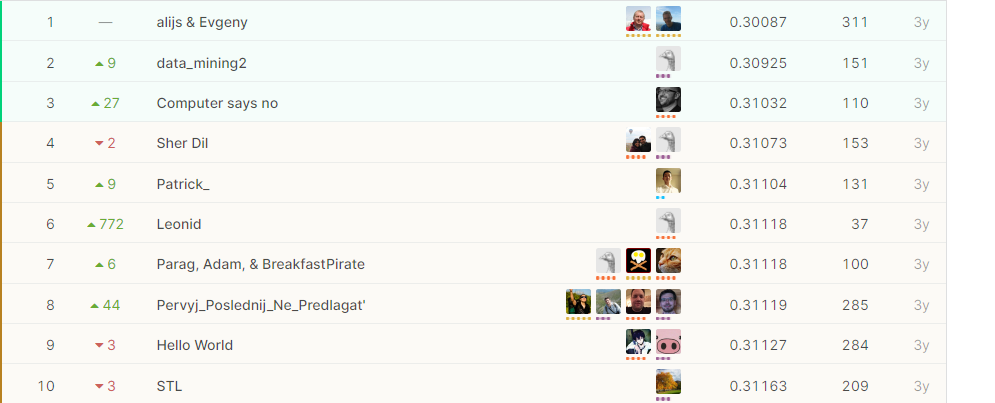

# Steps that i have permormed in this Assignment:

1. Dropped all the columns which has variance with respect to respose variable less than eqaual 5% and also dropped the useless ids from the dataset.

2. Missing values computation: find all the missing values drop all the rows for which missing values is less than equal to 5%, if the columns has missing values between 5 to 30% then replace all the missing values with the median of the columns, and for the missing values greater than 30 % i have used model based imputation(KNN) for filling the missing values.

3. Then i spilt train data in to two parts train and for cross validation

4. After spliting the data i am converting all the categorical data in to integer by label enconder and for all the numeric data i am doing min-max normalization.

5. After preparing the data i have applied different models and store the models in to the pickle file.

6. Now we have our best model, at last i am prediction all the test data prices
and has stored the results in the csv file.